In [14]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from pathlib import Path

from attila.util.config import get_config
from attila.data.parse import parse_data, get_data
from attila.experiments.data import load_experiments, save_experiments
from attila.experiments.do import do_experiments

In [16]:
_here = Path('.').resolve()
config = get_config(_here / './config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [4]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

In [20]:
experiments_file = _here / config.get('experiments', 'output file')
experiments = load_experiments(experiments_file)

In [8]:
experiments = do_experiments(experiments, (X, y), config, out_path)
save_experiments(experiments, out_path / config.get('experiments', 'output file'))

ready to perform 8 experiments
=== experiment # 1 / 8: with_same
= dataset training: X ~ (73, 252, 252, 1), y ~ (73, 252, 252, 1)
= dataset validation: X ~ (9, 252, 252, 1), y ~ (9, 252, 252, 1)
= dataset test (not used): X ~ (10, 252, 252, 1), y ~ (10, 252, 252, 1)
=== model
= # layers: 25
= # total params: 1881985
= # trainable params: 1881985
= # non-trainable params: 0
Epoch 1/5
19/19 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9032 - mean_IoU: 0.1224 - DSC: 0.1408
Epoch 00001: loss improved from inf to 0.25732, saving model to /home/h4/stfo194b/scratch/attila/out/with_same/model.h5
19/19 [==============================] - 1s 70ms/step - loss: 0.2573 - accuracy: 0.9032 - mean_IoU: 0.1224 - DSC: 0.1408 - val_loss: 0.2326 - val_accuracy: 0.9645 - val_mean_IoU: 0.5485 - val_DSC: 0.6884 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9867 - mean_IoU: 0.7799 - DSC: 0.8694
Epoch 00002: loss improved from 0.2

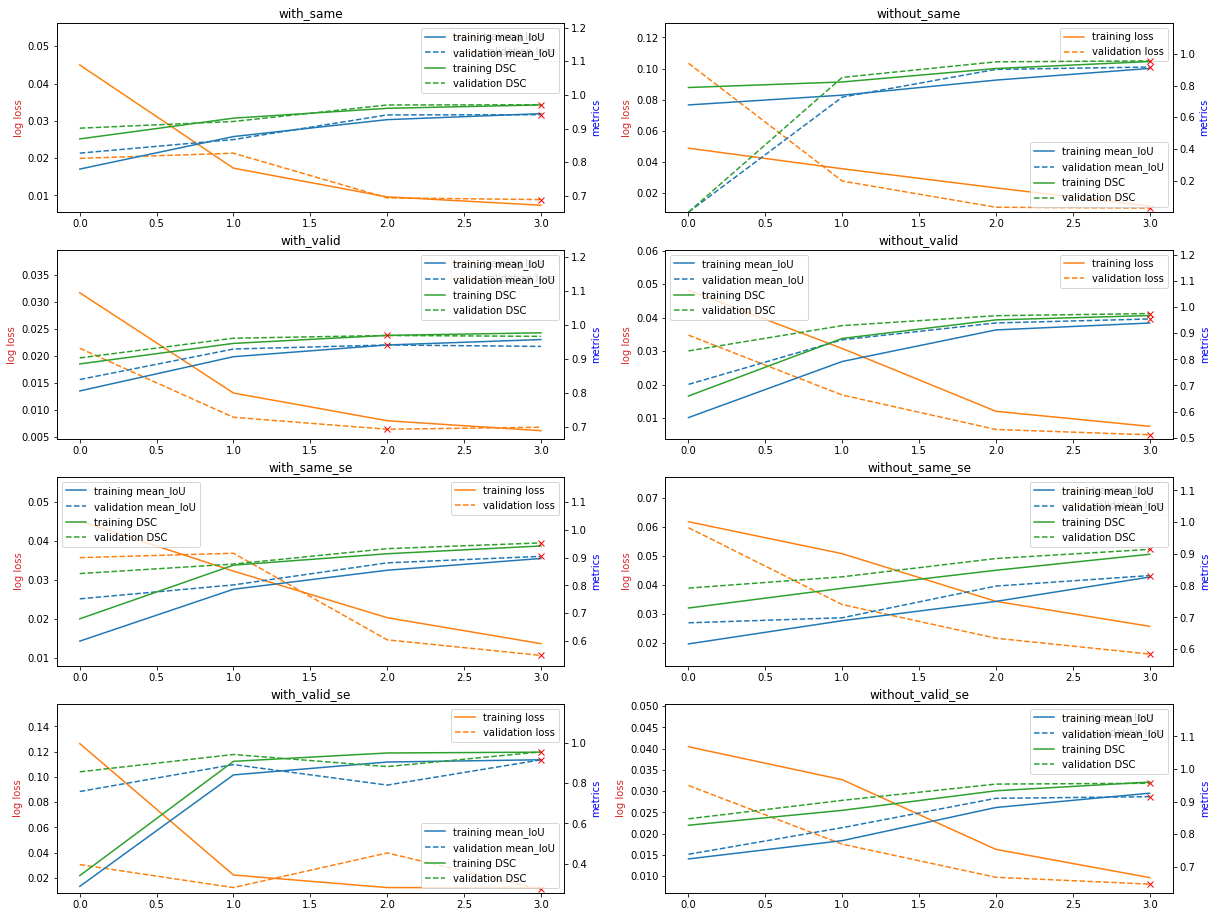

In [26]:
from attila.util.plots import plot_preds, plot_history

last_epochs = int(config.getint('training', 'epochs') * 0.8)
plot_history(experiments, out_path / 'history.png', last=last_epochs)